# PHYS 320 Homework 4 Code Notebok
#### By Ansh Gupta

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

from astropy.cosmology import LambdaCDM
from astropy.cosmology import Planck18 as cosmo

## Problem 1

In [87]:
def H(z, H0=70, omega_m=0.3, omega_l=0.7, omega_0=1):
    omega_k = omega_0 - omega_m - omega_l
    return H0 * np.sqrt( omega_m*(1+z)**3 + omega_k*(1+z)**2 + omega_l )

In [105]:
test_cosmo_1 = LambdaCDM(H0=70, Om0=1, Ode0=0)
test_cosmo_2 = LambdaCDM(H0=70, Om0=0.3, Ode0=0)
test_cosmo_3 = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [3]:
cosmo_args = (70, 0.3, 0.7)
H(0.1, *cosmo_args)

73.39325582095401

In [7]:
cosmo.H(0)

<Quantity 67.66 km / (Mpc s)>

In [8]:
cosmo.H(0)

<Quantity 67.66 km / (Mpc s)>

In [102]:
def comoving_distance(z, *cosmo_args):
    c = 3e5
    H_inv = lambda z, *cosmo_args: c / H(z, *cosmo_args)
    
    if isinstance(z, (int, float)):
        r, _ = integrate.quad(H_inv, a=0, b=z, args=(cosmo_args))
        return r
    
    r = np.zeros_like(z)
    for i in range(len(z)):
        r[i], _ = integrate.quad(H_inv, a=0, b=z[i], args=(cosmo_args))
        
    return r

def distance_measure(z, H0=70, omega_m=0.3, omega_l=0.7, omega_0=1):
    c = 3e5
    prefactor = c / ( H0 * omega_0**2)

def angular_distance(z, *cosmo_args):
    r = comoving_distance(z, *cosmo_args)
    return r/(1+z)

def luminosity_distance(z, *cosmo_args):
    r = comoving_distance(z, *cosmo_args)
    return r*(1+z)

In [80]:
comoving_distance(5, *cosmo_args)

(7780.7532724484345, 2.5248467831246476e-09)

In [81]:
cosmo.comoving_distance(5) 

<Quantity 7946.29340367 Mpc>

In [82]:
z = np.linspace(0.1, 5, 100)
cosmo_1_args = (70, 1, 0)
cosmo_2_args = (70, 0.3, 0)
cosmo_3_args = (70, 0.3, 0.7)

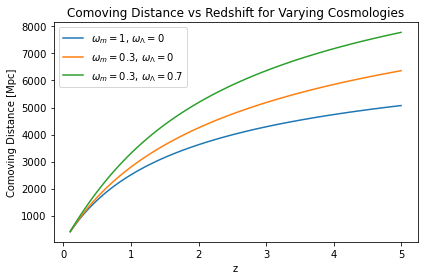

In [83]:
r1 = comoving_distance(z, *cosmo_1_args)
r2 = comoving_distance(z, *cosmo_2_args)
r3 = comoving_distance(z, *cosmo_3_args)

plt.title('Comoving Distance vs Redshift for Varying Cosmologies')
plt.xlabel('z')
plt.ylabel('Comoving Distance [Mpc]')
plt.plot(z, r1, label=r'$\omega_m = 1$, $\omega_{\Lambda} = 0$')
plt.plot(z, r2, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0$')
plt.plot(z, r3, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0.7$')
plt.legend()
plt.tight_layout()

In [109]:
test_cosmo_2.angular_diameter_distance(5)

<Quantity 1295.89508258 Mpc>

In [110]:
angular_distance(5, *cosmo_2_args)

1060.288820530299

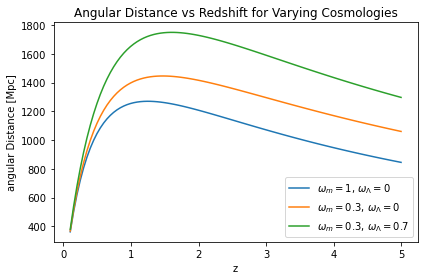

In [93]:
d_A1 = angular_distance(z, *cosmo_1_args)
d_A2 = angular_distance(z, *cosmo_2_args)
d_A3 = angular_distance(z, *cosmo_3_args)

plt.title('Angular Distance vs Redshift for Varying Cosmologies')
plt.xlabel('z')
plt.ylabel('angular Distance [Mpc]')
plt.plot(z, d_A1, label=r'$\omega_m = 1$, $\omega_{\Lambda} = 0$')
plt.plot(z, d_A2, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0$')
plt.plot(z, d_A3, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0.7$')
plt.legend()
plt.tight_layout()

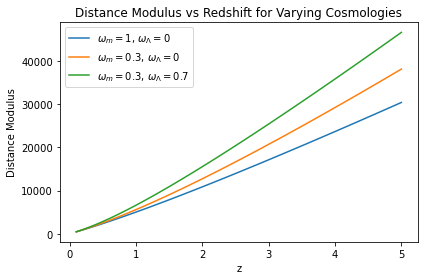

In [96]:
d_L1 = luminosity_distance(z, *cosmo_1_args)
d_L2 = luminosity_distance(z, *cosmo_2_args)
d_L3 = luminosity_distance(z, *cosmo_3_args)

distmod_1 = 5*np.log10(d_L1*1e6/10)
distmod_2 = 5*np.log10(d_L2*1e6/10)
distmod_3 = 5*np.log10(d_L3*1e6/10)

plt.title('Distance Modulus vs Redshift for Varying Cosmologies')
plt.xlabel('z')
plt.ylabel('Distance Modulus')
plt.plot(z, d_L1, label=r'$\omega_m = 1$, $\omega_{\Lambda} = 0$')
plt.plot(z, d_L2, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0$')
plt.plot(z, d_L3, label=r'$\omega_m = 0.3$, $\omega_{\Lambda} = 0.7$')
plt.legend()
plt.tight_layout()

In [4]:
w_min = w0 - 15*gamma # minimum driving frequency for plotting
w_max = w0 + 15*gamma # maximum driving frequency for plotting
n = 200 # number of points to plot
w = np.linspace(w_min, w_max, n) # array of driving frequencies

In [5]:
# real and imaginary part of complex lorentzian
x_re = lambda w: e_me / (2*w) * (w0 - w) / ((w0 - w)**2 + gamma**2)
x_im = lambda w: e_me / (2*w) * gamma / ((w0 - w)**2 + gamma**2);

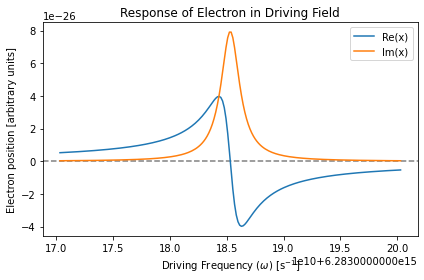

In [16]:
plt.plot(w, x_re(w), label='Re(x)')
plt.plot(w, x_im(w), label='Im(x)')
plt.axhline(0, ls='--', c='grey', zorder=-1)
plt.title('Response of Electron in Driving Field')
plt.xlabel(r'Driving Frequency ($\omega$) [s$^{-1}$]')
plt.ylabel('Electron position [arbitrary units]')
plt.legend()
plt.tight_layout()

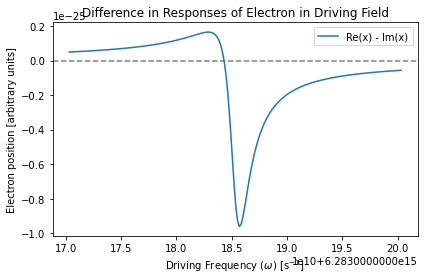

In [17]:
plt.plot(w, x_re(w) - x_im(w), label='Re(x) - Im(x)')
plt.axhline(0, ls='--', c='grey', zorder=-1)
plt.title('Difference in Responses of Electron in Driving Field')
plt.xlabel(r'Driving Frequency ($\omega$) [s$^{-1}$]')
plt.ylabel('Electron position [arbitrary units]')
plt.legend()
plt.tight_layout()

## Problem 2

In [18]:
# define two peak functions based on their FWHM (w) and resonance center (b)
f_g = lambda x, w, b: np.exp(-4 * np.log(2) * (x - b)**2 / (w**2)) # gaussian
f_l = lambda x, w, b: (w/2)**2 / ((x - b)**2 + (w/2)**2) # lorentzian

In [39]:
w0 = 5 # example FWHM for plotting
b0 = 0 # example center value for plotting
x = np.linspace(-10, 10, 100) # x values to plot

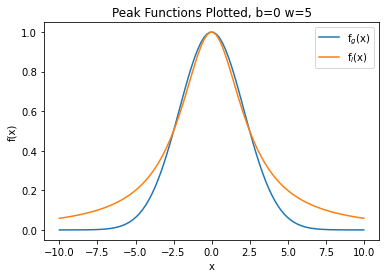

In [46]:
plt.plot(x, f_g(x, w0, b0), label=r'f$_g$(x)')
plt.plot(x, f_l(x, w0, b0), label=r'f$_l$(x)')
plt.title('Peak Functions Plotted, b=0 w=5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

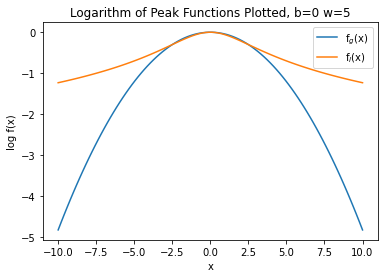

In [55]:
plt.plot(x, np.log10(f_g(x, w0, b0)), label=r'f$_g$(x)')
plt.plot(x, np.log10(f_l(x, w0, b0)), label=r'f$_l$(x)')
plt.title('Logarithm of Peak Functions Plotted, b=0 w=5')
plt.xlabel('x')
plt.ylabel('log f(x)')
plt.legend()

Generally, both profiles have a very similar shape towards the center, but the outer parts are quite different. The Lorentzian profile has wings which are much wider/higher than that of the gaussian. This is numerically demonstrated when we take the log of both functions; the Lorentzian reaches just under 1/10 the max height at twice the FWMH from the center, whereas the Gaussian  is almost as low as $10^{-5}$ at the same x value.

## Problem 3

$ |E_0(z)| = |E_0(0)|\text{exp}[(-\alpha/2)z] $\
We want $ |E_0(z)| = 0.01 |E_0(0)| $\
So $ 0.01 |E_0(0)| = |E_0(0)|\text{exp}[(-\alpha/2)z] $\
$ 0.01 = \text{exp}[(-\alpha/2)z] $\
$ \text{ln}(0.01) = (-\alpha/2)z $\
Plugging in $\alpha = 1.5/\text{cm}$ and $z = L$:\
$ -2\text{ln}(0.01)/(1.5/\text{cm}) = L $\
$ L = -2\text{ln}(0.01)/1.5 \text{ cm} \approx 6.14 \text{ cm}$ 

## Problem 4 (3.63)
C$_1$ is the minimum index of refraction regardless of wavelength. If the wavelength goes to infinity, the index of refraction will be exactly equal to C$_1$.

## Problem 5-6 (3.65 and 3.66)

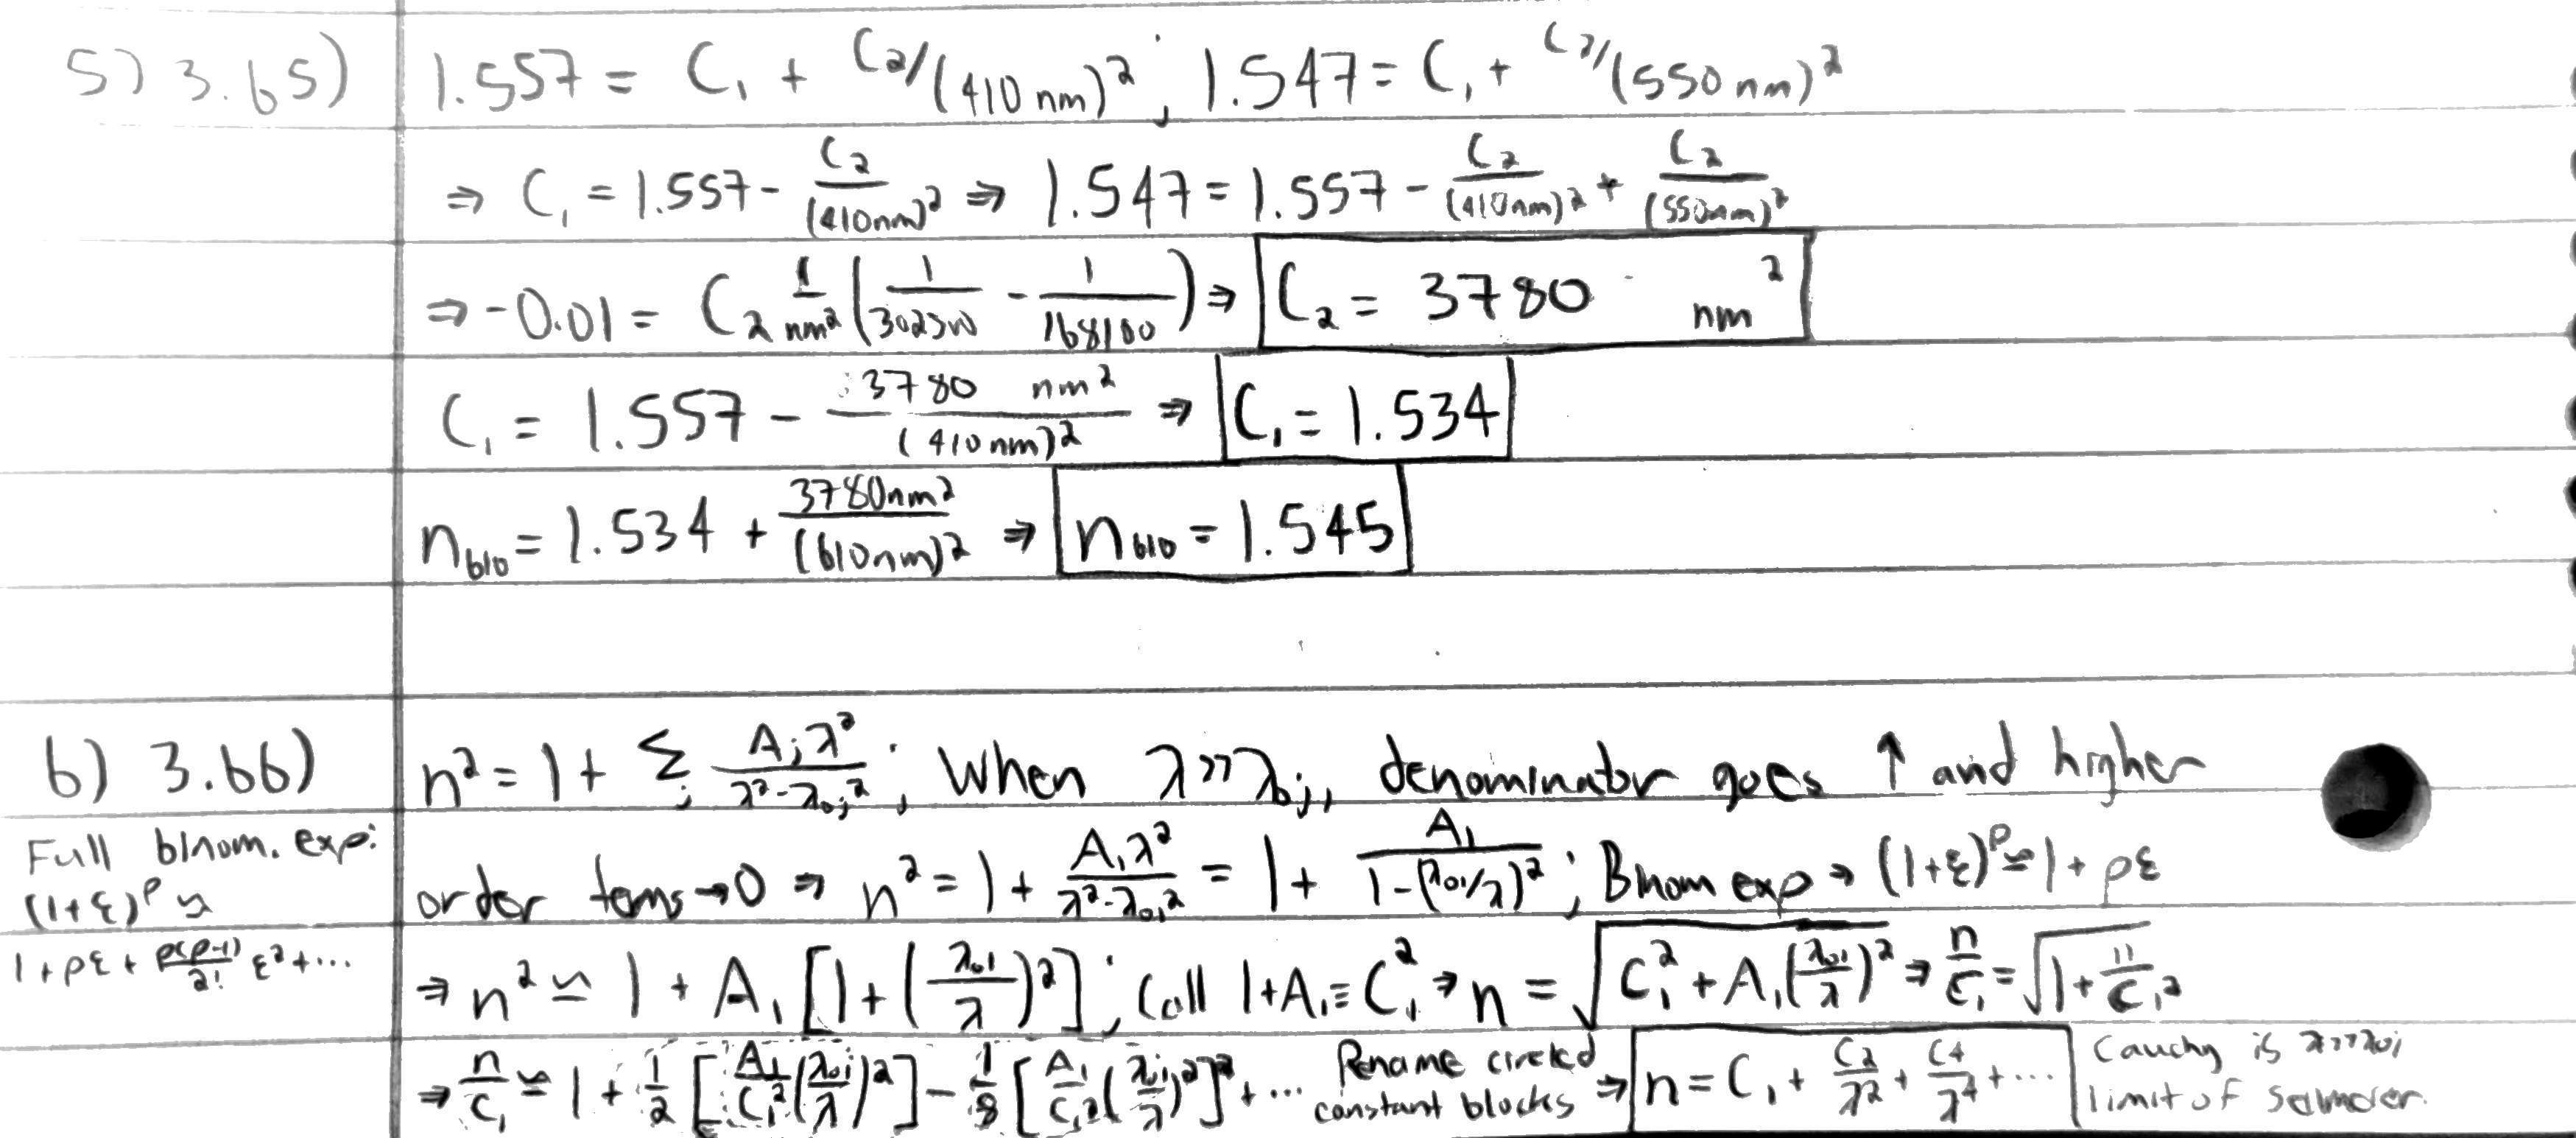